# Regression Notebook

This notebook automatically generates a linear fit and prints the fit paramaters (slope, y-intercept, and $R^2$) for a set of data. This notebook is meant to be useable even if you have no coding background (see the instructions below), but if you do or you are curious feel free to play around with it by editing the code. The notebook is organized in a set of "code blocks" that contain python code and can be run. Any output from the code appears below each block. The purpose of each block is described directly above the block. 

**To use this notebook:**

1. Enter your data in the cell below under `Data entry.` `X` and `Y` represent the X and Y variable respectively, `X_ERR` and `Y_ERR` represent the absolute error in each of those variables. Each of these must be entered as a list of numbers seperated by `,` and surrounded by `[` and `]`. (e.g. `[0.2, 1.2, 3.4]`). 
2. You should also change the figure title using the `TITLE` variable and the labels for the axes using the `X_LABEL` and `Y_LABEL` variables (these are also under the `Data entry` section). Make sure to surround these by `"` and `"` (e.g. `speed (cm/s)`). 
3. Finally, if you would _not_ like the linear regression to run change the `REG_TYPE` variable from `"linear"` to `"none"`. 
4. From the menu above select `Cell > Run All.` (This is important, the `play` button only runs the current cell not the previous ones.)
5. Scroll to the bottom of the page to find the parameters and a graph of your data & fit. Right click on the graph to download it to your computer. 

**What to do if the notebook hangs (doesn't run)**

If you find the notebook doesn't do anything when you run all cells. Go to `Kernel > Restart Kernel...`. It should run fine after this point. If it doesn't, close the tab and restart. 

**How to save your data for future use**

Every time you load this notebook, it will start fresh and there is no way to save it. Once you have your plot together correctly _you should save the contents of the `Data Entry` block to another doument (such as a Google Doc)_ so you can easily cut and paste it back in to this page to reproduce your plot. 

**Entering large/small numbers using scientific notation**

Python understands scientific notation to enter values that are large/small (e.g. `7.6e-4` = $7.6 \times 10^{-4}$)

## Importing packages and defining models

This cell imports the packages needed to run the regression. **No need to edit the cell below, just run it.** 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import Model, RealData, ODR
import random
from scipy.stats import t as studentt

## Data entry

**The cell below is the one you need to edit and run.** Replace `X`, `Y`, `X_ERR`, `Y_ERR` to produce a fit with real data. Replace `X_LABEL` and `Y_LABEL` to set the labels for each variable.

Use scientific notation to enter values that are large/small (e.g. `7.6e4` = $7.6 \times 10^4$)

In [2]:
# This variable sets the regression type. It should be 'none', 'linear', or 'quadratic'
REG_TYPE = "linear"

# Axes labels, change these to the appropriate names and don't forget to specify the units
TITLE = "Free fall exp. 1"
X_LABEL = "distance (cm)"
Y_LABEL = "speed (cm/s)"

# Enter the data
# Replace X, Y, X_ERR, Y_ERR, with your real data, 
# X_ERR and Y_ERR are absolute error in X and Y resepctively
X     = [0, 1, 2, 3, 4, 5]
X_ERR = [.2, .2, .2, .2, .2, .2]
Y     = [0.1, 2.0, 3.9, 6.3, 7.8, 10.2]
Y_ERR = [.4, .4, .4, .4, .4, .4]


for i in ['X', 'Y', 'X_ERR', 'Y_ERR']:
    exec('{0} = np.array({0})'.format(i))

## Run the regression

Defining the models we would like to use. **No need to edit the cell below, just run it.** 

In [3]:
# Define a linear to fit the data.
def linear_func(p, x):
     m, b = p
     return m*x + b

# Define a quadratic function to fit the data.
def quad_func(p, x):
     a, b, c = p
     return a*x**2 + b*x + c 

# Choose your model, no need to alter this
if REG_TYPE == "linear":
    MODEL = linear_func
elif REG_TYPE == "quadratic":
    MODEL = linear_func
else:
    MODEL = None

The code box below executes the regression, prints the slope, y-intercept, and R^2 value, and generates a plot including the line of best fit. Right click the image generated to save it to your computer (it is in `.PNG` format). **No need to edit the cell below, just run it.** 

slope:	 2.011E+00 +/- 1.384E-01
y-int:	 2.236E-02 +/- 4.190E-01
R^2:	 0.999


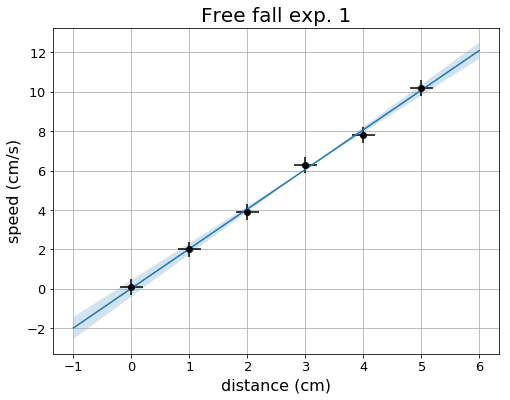

In [5]:
# Checking whether the data you entered has the same lengths
try:
    assert len(X) == len(Y)
    assert len(X) == len(X_ERR)
    assert len(Y) == len(Y_ERR)
except:
    print("data are not all the same length! You must fix for fit to work properly.")
    print("(length X = {0}, length X_ERR = {1}, length Y = {2}, length Y_ERR = {3})".format(len(X), len(X_ERR), len(Y), len(Y_ERR)))
    raise
    
if REG_TYPE != 'none':
    # Create a model for fitting.
    my_model = Model(MODEL)

    # Create a RealData object using our initiated data from above.
    data = RealData(X, Y, sx=X_ERR, sy=Y_ERR)

    # Set up ODR with the model and data.
    odr = ODR(data, my_model, beta0=[0., 1.])

    # Run the regression.
    out = odr.run()

if REG_TYPE == 'linear':
    # Calculating R^2 value 
    SSE_Y = np.sum(out.eps**2)
    SSE_X = np.sum(out.delta**2)
    SSTO_Y = np.sum((Y - np.mean(Y))**2)
    SSTO_X = np.sum((X - np.mean(X))**2)
    R2 = 1. - (SSE_X/SSTO_X) - (SSE_Y/SSTO_Y)
    
    # Converting to confidence interval 
    DOF = out.iwork[10]
    t = studentt.interval(0.95,DOF)[1]
    
    # Use the in-built pprint method to give us results.
    # out.pprint()
    info = {'m': '{0: .3E} +/- {1:.3E}'.format(out.beta[0], t*out.sd_beta[0]), 
            'b': '{0: .3E} +/- {1:.3E}'.format(out.beta[1], t*out.sd_beta[1]),
            'R2': '{0: .3f}'.format(R2)}
    print('slope:\t{m}\ny-int:\t{b}\nR^2:\t{R2}'.format(**info))

# Setup the plot
fig, ax = plt.subplots(figsize=(8,6))
ax.grid()
ax.set_title(TITLE, fontsize = 20)
ax.set_xlabel(X_LABEL, fontsize = 16)
ax.set_ylabel(Y_LABEL, fontsize = 16)
ax.ticklabel_format(axis='both', style='sci', scilimits=(-2,2), useMathText=True)
ax.tick_params(labelsize = 13)

# Plot the data
ax.errorbar(X, Y, xerr=X_ERR, yerr=Y_ERR, linestyle='None', marker='o', color='k')

if REG_TYPE != 'none':
    # Plot the linear fit and 95% confidence interval
    x_range = np.max(X) - np.min(X)
    x_fit = np.linspace(np.min(X) - .2 * x_range, np.max(X) + 0.2 * x_range, 1000)
    y_fit = MODEL(out.beta, x_fit)
    y_max = MODEL(out.beta + t*np.array([out.sd_beta[0], -out.sd_beta[1]]), x_fit)
    y_min = MODEL(out.beta - t*np.array([out.sd_beta[0], -out.sd_beta[1]]), x_fit)
    ax.plot(x_fit, y_fit)
    ax.fill_between(x_fit, y_min, y_max, alpha=.2)

plt.show()

Note that the parameters listed above are in scientific notation. (e.g. `2.236E-02` =  $2.236 \times 10^{-2}$)


Right click on the image above to save it to your computer (It is in `.PNG` format). 